# Toy networks

In [10]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

## Introduction

These are some toy network examples we can use to start doing simulations. I'm using the library **networkx**, which provides lots of functionality and makes it easy to manipulate nodes/edges, get subnetworks, etc. For this to work you need to install it first. Also make sure you have the library **matplotlib** for the plotting to work.

The networks are weighted, so we can do a more realistic simulation if we want to (and compare with the old one). For convenience, I also include a function that turns it into an unweighted network (where edges can just be 1 and -1).

Currently, there are four toy examples implemented. You can choose which example you want by the keyword "which" in the toy_graph funcion.

In [97]:
def get_toy_graph(which='simplest'):
    '''
    Returns networkx object of toy examples to test model on. 
    
    which: Choose which toy example to return. Can be one of 'simplest', 'simple', 'feedback', 'multiple_regulation'
    and 'multiple regulation feedback'.
    '''
    G = nx.DiGraph()
    
    # May the gods of programming languages forgive me for this shitty code.
    if which == 'simplest':
        G.add_edge('TF', 'gene1', weight=0.8)
        G.add_edge('TF', 'gene2', weight=-1.2)
    elif which == 'simple':
        G.add_edge('TF1.1', 'TF2.1', weight=0.8)
        G.add_edge('TF1.1', 'TF2.2', weight=-1.2)
        G.add_edge('TF2.1', 'gene1', weight=1.5)
        G.add_edge('TF2.1', 'gene2', weight=-0.4)
        G.add_edge('TF2.2', 'gene3', weight=0.9)
        G.add_edge('TF2.2', 'gene4', weight=-2.2)
    elif which == 'feedback':
        G.add_edge('TF1.1', 'TF2.1', weight=0.8)
        G.add_edge('TF1.1', 'TF2.2', weight=-1.2)
        G.add_edge('TF2.1', 'gene1', weight=1.5)
        G.add_edge('TF2.1', 'gene2', weight=-0.4)
        G.add_edge('TF2.2', 'gene3', weight=0.9)
        G.add_edge('TF2.2', 'gene4', weight=-2.2)
        G.add_edge('TF2.2', 'TF1.1', weight=-1.5) # Feedback.
    elif which == 'multiple_regulation':
        G.add_edge('TF1.1', 'TF2.1', weight=0.8)
        G.add_edge('TF1.1', 'TF2.2', weight=-1.2)
        G.add_edge('TF2.1', 'gene1', weight=1.5)
        G.add_edge('TF2.1', 'gene2', weight=-0.4)
        G.add_edge('TF2.2', 'gene3', weight=0.9)
        G.add_edge('TF2.2', 'gene4', weight=-2.2)
        G.add_edge('TF2.2', 'gene2', weight=-0.7)
        G.add_edge('TF2.1', 'gene3', weight=-0.7)
    elif which == 'multiple_regulation_feedback':
        G.add_edge('TF1.1', 'TF2.1', weight=0.8)
        G.add_edge('TF1.1', 'TF2.2', weight=-1.2)
        G.add_edge('TF2.1', 'gene1', weight=1.5)
        G.add_edge('TF2.1', 'gene2', weight=-0.4)
        G.add_edge('TF2.2', 'gene3', weight=0.9)
        G.add_edge('TF2.2', 'gene4', weight=-2.2)
        G.add_edge('TF2.2', 'gene2', weight=-0.7)
        G.add_edge('TF2.1', 'gene3', weight=-0.7)
        G.add_edge('gene3', 'TF1.1', weight=-0.5)
    return G

def discretize_edges(G):
    '''
    Takes a graph with edge weights and turns it into the discretized
    version, where edges are {-1,0, 1}.
    
    returns: networkx DiGraph with discretized weight.
    '''
    H = G.copy()
    for u,v,d in H.edges(data=True):
        d['weight'] = np.sign(d['weight'])
    return H

def split_adj_matrix(A):
    '''
    Takes in matrix of 1 and -1 and returns two matrices
    '''
    Aa = np.array((A.toarray() == 1), dtype = 'int32') # Consider making this float64 instead.
    Ai = np.array((A.toarray() == -1), dtype = 'int32')
    return Aa, Ai

In [98]:
def visualize(G):
    edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())

    pos = nx.spring_layout(G, weight=None) # get edge positions
    #pos = nx.graphviz_layout(G)
    nx.draw(G, pos, node_color='k', edgelist=edges,
            edge_color=weights, edge_cmap=plt.cm.coolwarm)
    # May want to try other colormaps.
    plt.show()
    

## Example

### Visualization

The toy examples have continuous edges. You can plot the example graphs as follows. 

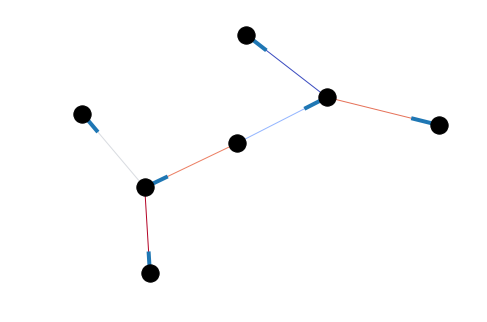

In [68]:
G = get_toy_graph('simple') # simplest is even smaller
visualize(G)

The edge colors in the visualization above are not yet "centered" at zero (I think the automatic thing is to use the middle in-between the endpoints of the data as the blue to red transition point). I still need to figure out how to force it to be 0.

You can also get the discretized version of the graph like this:

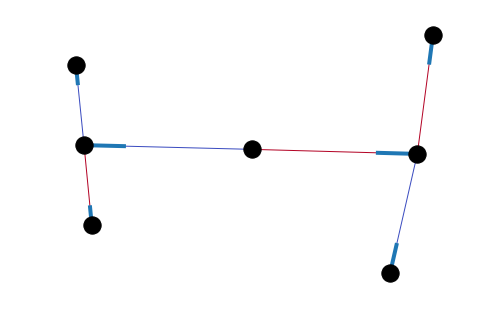

In [73]:
H = discretize_edges(G)
visualize(H)

### Weight and adjacency matrix

We can get the weight matrix by simply doing

In [74]:
W = nx.adjacency_matrix(G)
print(W)

  (0, 1)	0.8
  (0, 2)	-1.2
  (1, 3)	1.5
  (1, 4)	-0.4
  (2, 5)	0.9
  (2, 6)	-2.2


The reason the output looks a little weird is that by default networkx uses a special type of numpy array that's optimized for sparse matrices. If necessary, it's simple to convert it to the regular numpy array.

In [86]:
W.toarray()

array([[ 0. ,  0.8, -1.2,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1.5, -0.4,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.9, -2.2],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

We can get the discretized version in the same way.

In [83]:
A = nx.adjacency_matrix(H)
print(A)

  (0, 1)	1.0
  (0, 2)	-1.0
  (1, 3)	1.0
  (1, 4)	-1.0
  (2, 5)	1.0
  (2, 6)	-1.0


In [93]:
A.toarray()

array([[ 0.,  1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

I included a function that splits this matrix into its activators and inhibitors. It may be a little inefficient, since it converts the matrices to the non-sparse form at the moment, but I'm having trouble getting it to work for the sparse versions for some reason.

In [99]:
Aa, Ai = split_adj_matrix(A)

In [100]:
Aa

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [101]:
Ai

array([[0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

These should be what we need to put stuff in the model. We should also have a more general function where we can just upload our weight matrix and run a simulation so we can run the "real" simulation to compare to the fake one (this should be simple to do).